# Subplot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Grundlegende Einstellungen

In [26]:
mpl.style.use("default") # Standart-Plot-Style andere, z.B. "seaborn-deep" unter https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib

Mathematischen Funktionen definieren, die geplottet werden sollen

In [27]:
n = 201 # Anzahl
# Definitionsmenge x:
# x ist ein Array aus gleichmäßig seperierten Zahlen in einem Intervall
x = np.linspace(0, 4.0*np.pi, n) # Parameter: (start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# Funktionen yi zu den Werten der Definitionsmenge
# y_1...y_3 sind drei Funktionen in Abhaengigkeit von den Werten der Definitionsmenge
y_1 = np.sin(x)
y_2 = np.cos(x)
y_3 = y_1 + y_2

Erste Funktion exeplarisch plotten

In [28]:
# Matplotlib im Juypter Notebook aktivieren
%matplotlib inline

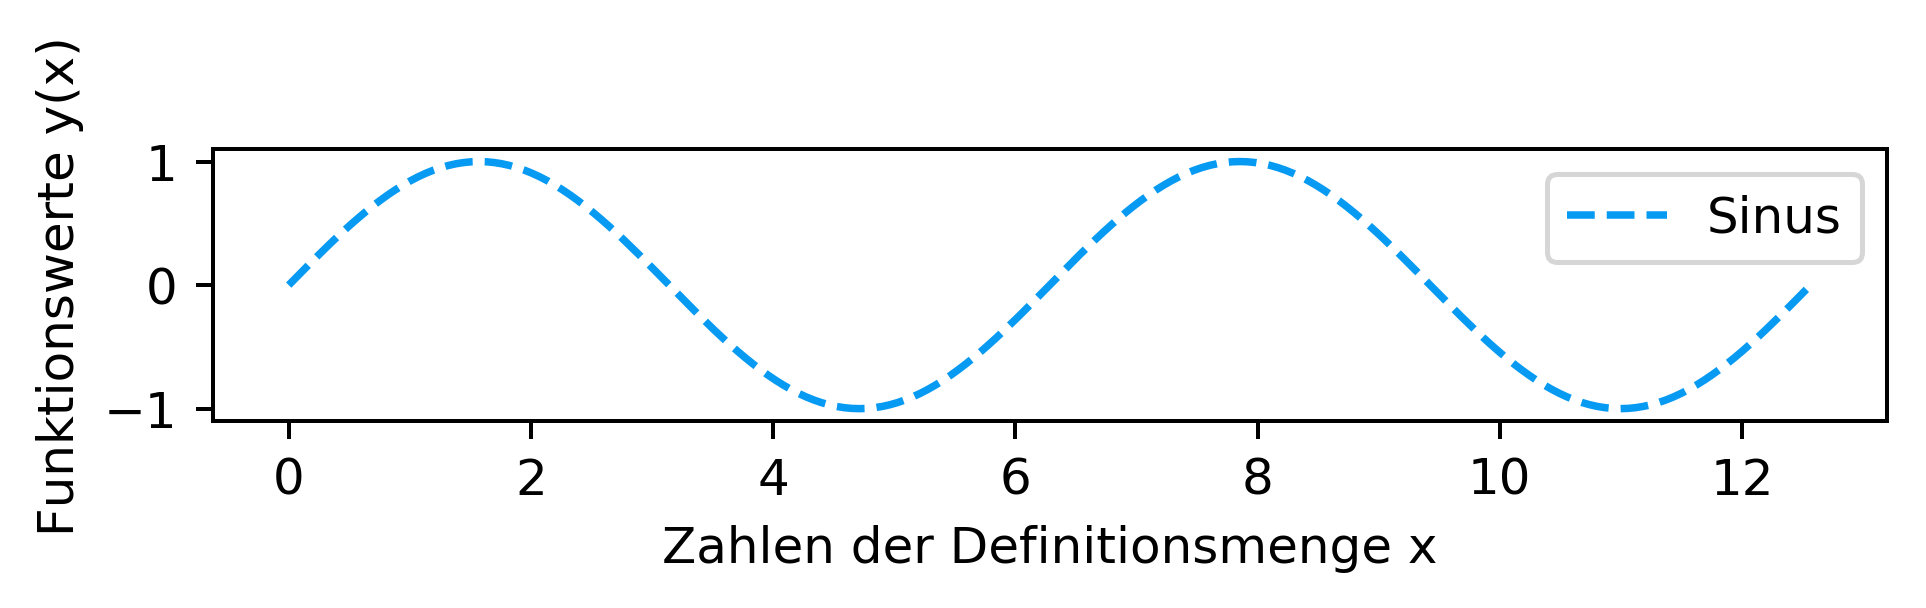

In [29]:
# Matplotlib-Container "figure" erstellen, der alle Plots enthaelt,
plt.figure(figsize=(6, 1), dpi=360) # figure(figsize=(1,1)) wuerde ein inch-zu-inch Verhaeltnis, bei 80-mal-80 Pixel generieren

# Axes-Object innerhalb der "figure" erstellen
plt.subplot(1,1,1) # row (Zeile), column (Spalte), innere figures (Reihenfolge wie Dokument gelesen)
plt.plot(x, y_1, color="xkcd:azure", linestyle="--", label="Sinus")

# Beschriftung x-Achse
plt.xlabel("Zahlen der Definitionsmenge x")
# Beschriftung y-Achse
plt.ylabel("Funktionswerte y(x)")
# Legende
plt.legend()

# Ausgeben
plt.show()

Alle Drei Funktionen in einer Figure (Container) plotten

In [30]:
# alte figure (Matplotlib-Container) schliessen
plt.close()

LaTeX-Schrift fuer Formeln aktivieren

In [31]:
from matplotlib import rc

# LaTeX-Schrift fuer Formeln einbinden
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Funktionen plotten

In [32]:
# Matplotlib im Juypter Notebook aktivieren
%matplotlib inline

Text(0.5, 1.3, '$y\\left(x\\right)=sin\\left(x\\right)+cos\\left(x\\right)$')

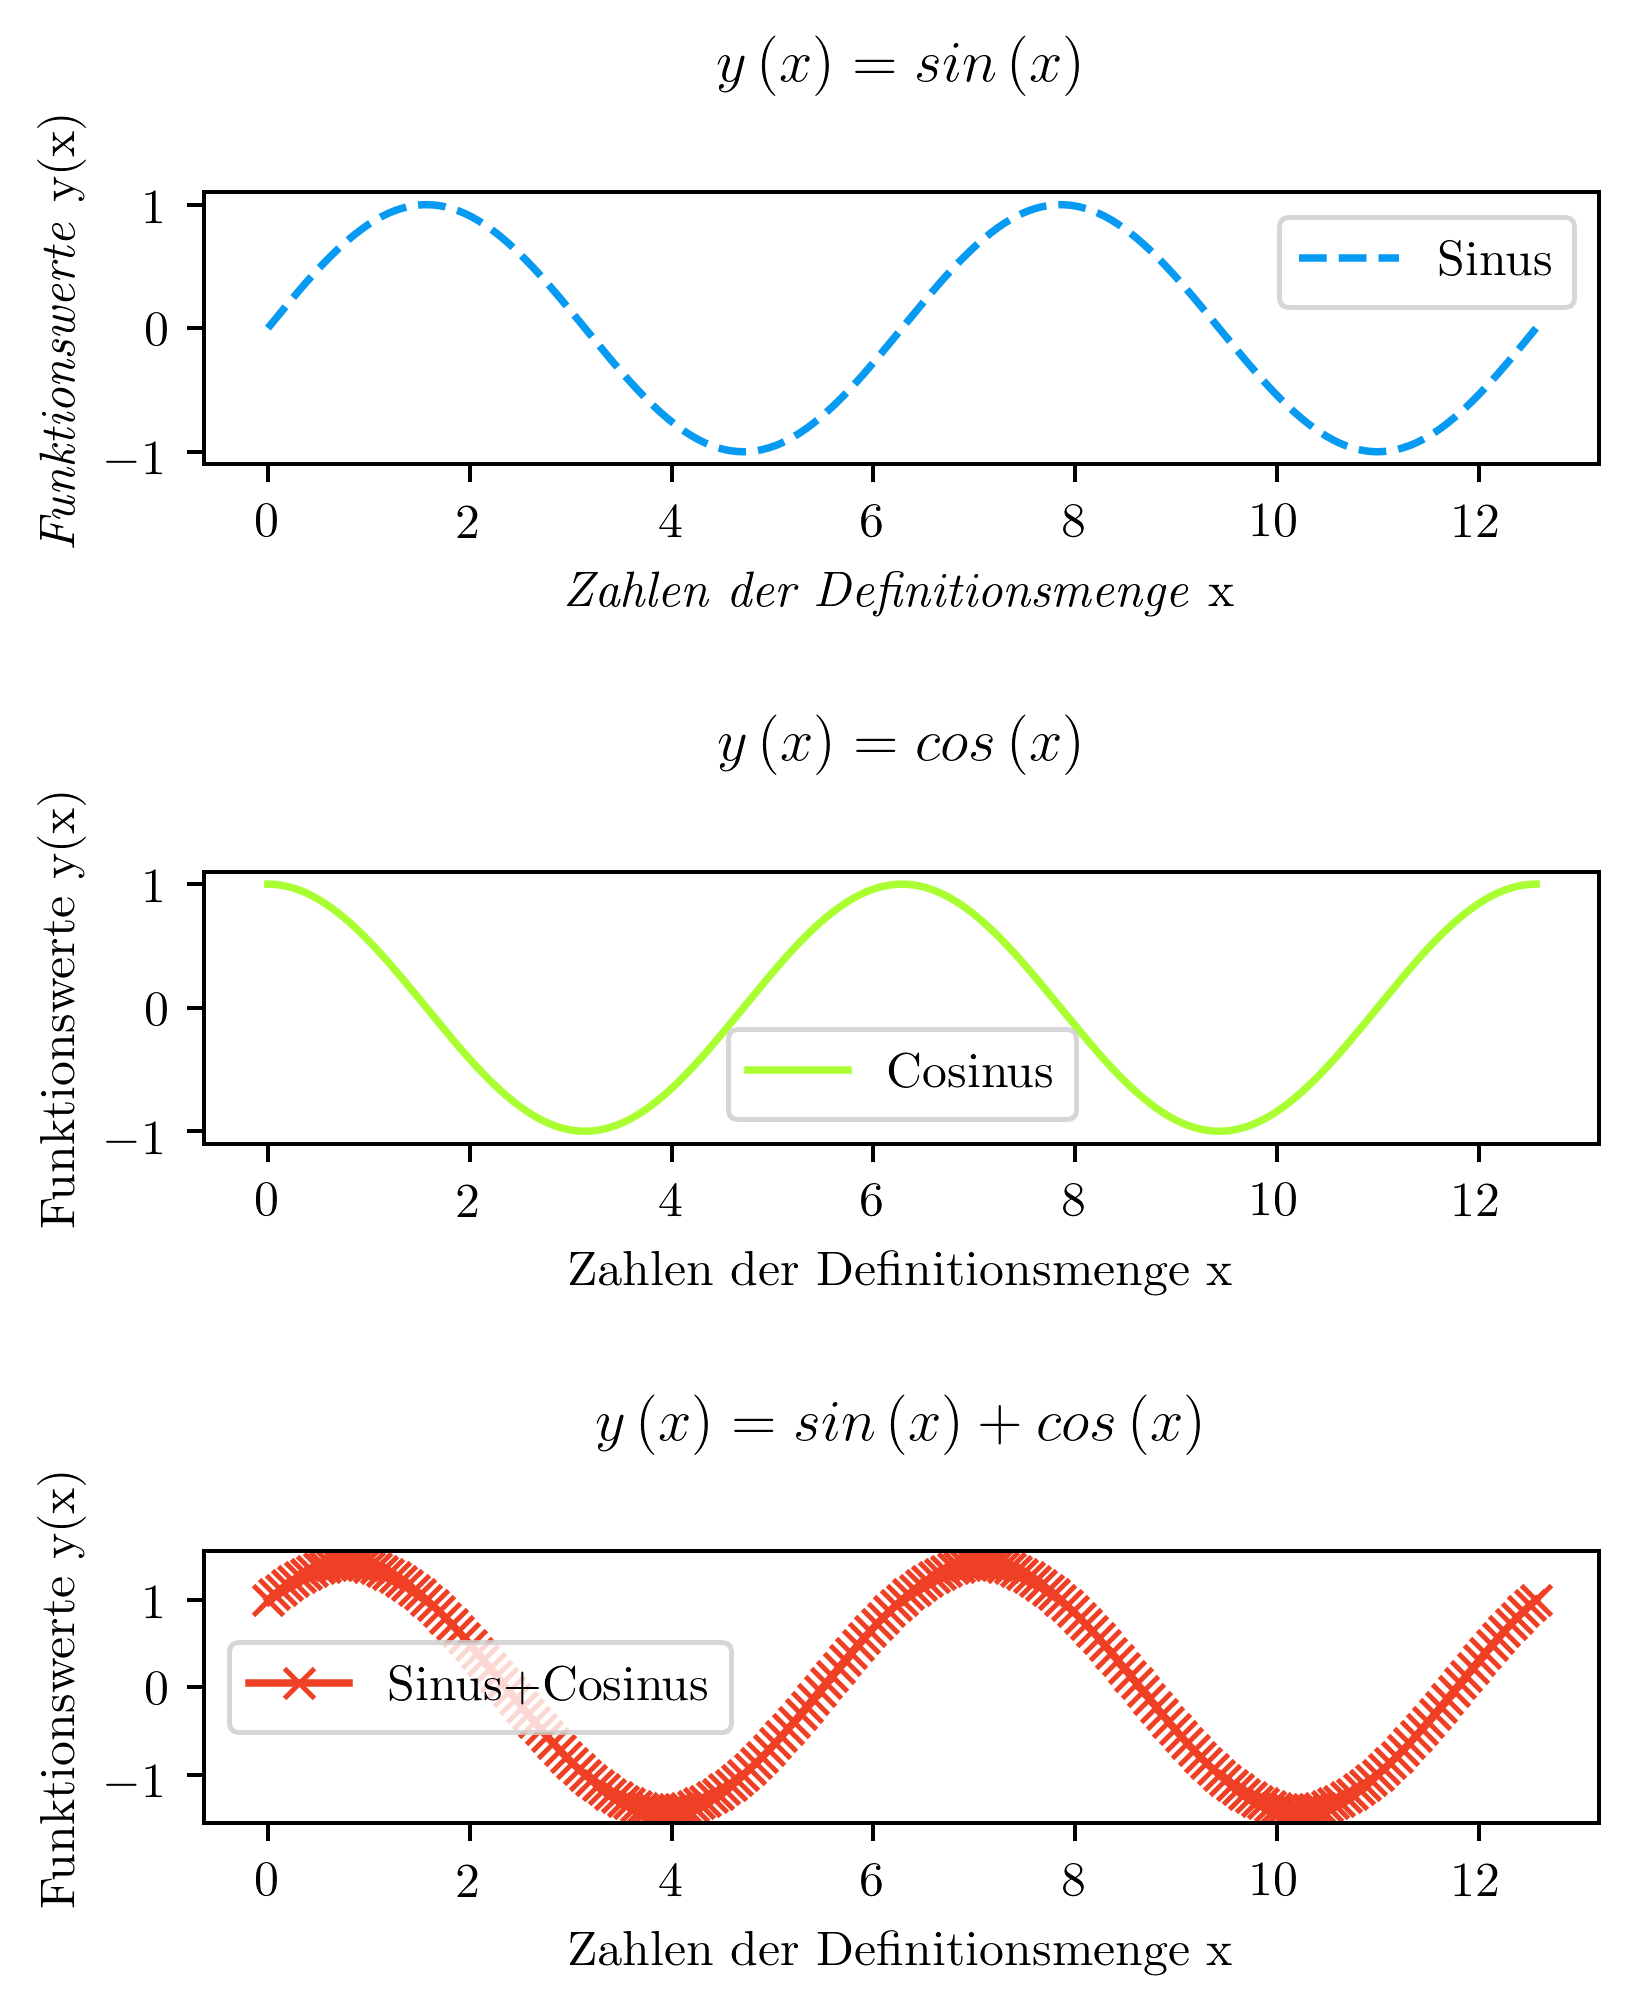

In [33]:
# Matplotlib-Container "figure" erstellen, der alle Plots enthaelt,
plt.figure(figsize=(5, 6),dpi=360) #figure(figsize=(1,1)) wuerde ein inch-zu-inch Verhaeltnis, bei 80-mal-80 Pixel generieren

# Abstand zwischen den Subplots
hspace = 1.5 
plt.subplots_adjust(hspace=hspace) # weitere: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

# LaTeX-Schrift fuer Formeln aktivieren
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# PLOT 1
# Axes-Object innerhalb der "figure" erstellen
plt.subplot(3,1,1) # Zeilen (rows), Spalten (columns), aktuelle figure in dieem Format aus Reihen und Spalten (Reihenfolge wie Dokument gelesen)
plt.plot(x, y_1, color="xkcd:azure", linestyle="--", label="Sinus") # Farben: https://matplotlib.org/users/colors.html
# Beschriftung x-Achse
plt.xlabel(r'\textit{Zahlen der Definitionsmenge} x') # kursive Schrift
# Beschriftung y-Achse
plt.ylabel(r'\textit{Funktionswerte} y(x)') # kursive Schrift
# Legende
plt.legend()
# Tiel
plt.title(r"$y\left(x\right)=sin\left(x\right)$", y=1.3) # etwas angehoben mit y=1.3

# PLOT 2
# Axes-Object innerhalb der "figure" erstellen
plt.subplot(3,1,2) # Zeilen (rows), Spalten (columns), aktuelle figure in dieem Format aus Reihen und Spalten (Reihenfolge wie Dokument gelesen)
plt.plot(x, y_2, color="xkcd:lime", linestyle="-", label="Cosinus") # liniestyles: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
# Beschriftung x-Achse
plt.xlabel("Zahlen der Definitionsmenge x")
# Beschriftung y-Achse
plt.ylabel("Funktionswerte y(x)")
# Legende
plt.legend()
# Tiel
plt.title(r"$y\left(x\right)=cos\left(x\right)$", y=1.3) # etwas angehoben mit y=1.3

# PLOT 3
# Axes-Object innerhalb der "figure" erstellen
plt.subplot(3,1,3) # Zeilen (rows), Spalten (columns), aktuelle figure in dieem Format aus Reihen und Spalten (Reihenfolge wie Dokument gelesen)
plt.plot(x, y_3, color="xkcd:tomato", marker="x", label="Sinus+Cosinus") # Marker: https://matplotlib.org/api/markers_api.html
# Beschriftung x-Achse
plt.xlabel("Zahlen der Definitionsmenge x")
# Beschriftung y-Achse
plt.ylabel("Funktionswerte y(x)")
# Legende
plt.legend()
# Tiel
plt.title(r"$y\left(x\right)=sin\left(x\right)+cos\left(x\right)$", y=1.3) # etwas angehoben mit y=1.3

# Koordinatensystem plotten

In [21]:
# Matplotlib im Juypter Notebook aktivieren
%matplotlib inline

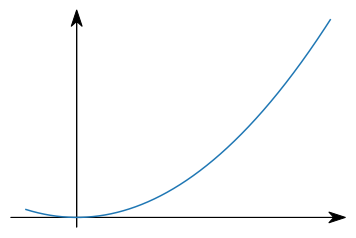

In [22]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


# plot
x = np.arange(-2., 10.0, 0.01)
plt.plot(x, x**2)
fig = plt.gcf()
fig.set_facecolor('white') 
ax = plt.gca()

arrowed_spines(fig, ax)

plt.show()